In [1]:
#Import the ne
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings("ignore")

In [2]:
#create the credentials
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
heart_db = 'heartdisease'

#create the engine
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, heart_db))

heart_df = pd.read_sql_query('select * from heartdisease',con=engine)

#dispose of the engine
engine.dispose()

In [3]:
#pulling the code from the lesson again
# Define the features and the outcome
X = heart_df.iloc[:, :13]
y = heart_df.iloc[:, 13]

# Replace missing values (marked by `?`) with a `0`
X = X.replace(to_replace='?', value=0)

# Binarize `y` so that `1` means heart disease diagnosis and `0` means no diagnosis
y = np.where(y > 0, 0, 1)

#standardize the new X set
scaler = StandardScaler()
X_trans = scaler.fit_transform(X)

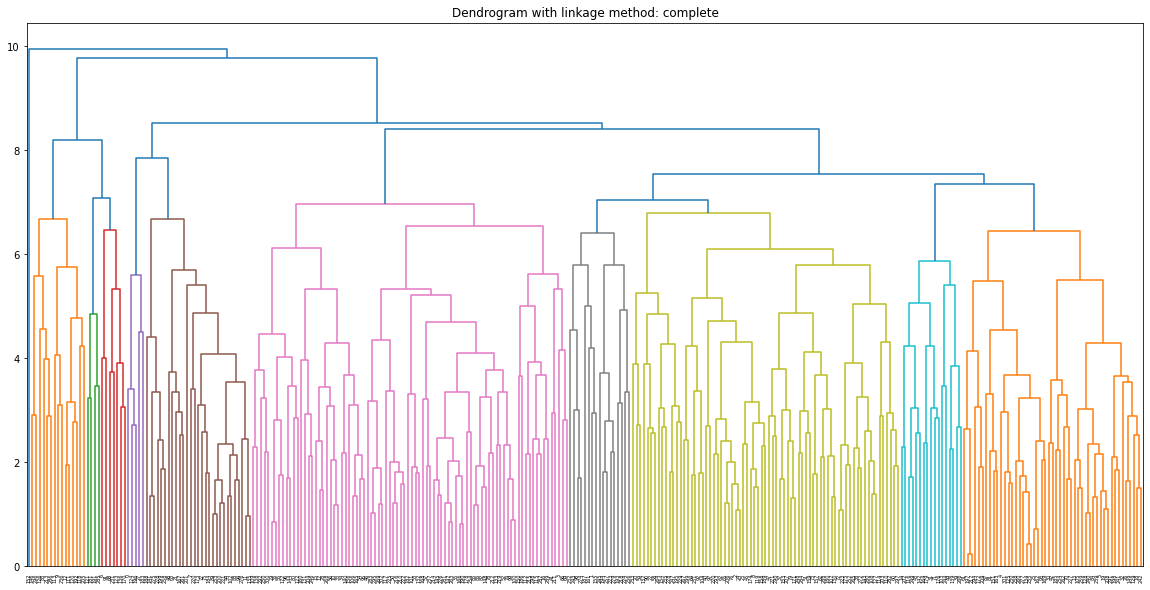

In [4]:
plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: complete")
dendrogram(linkage(X_trans, method='complete'))
plt.show()

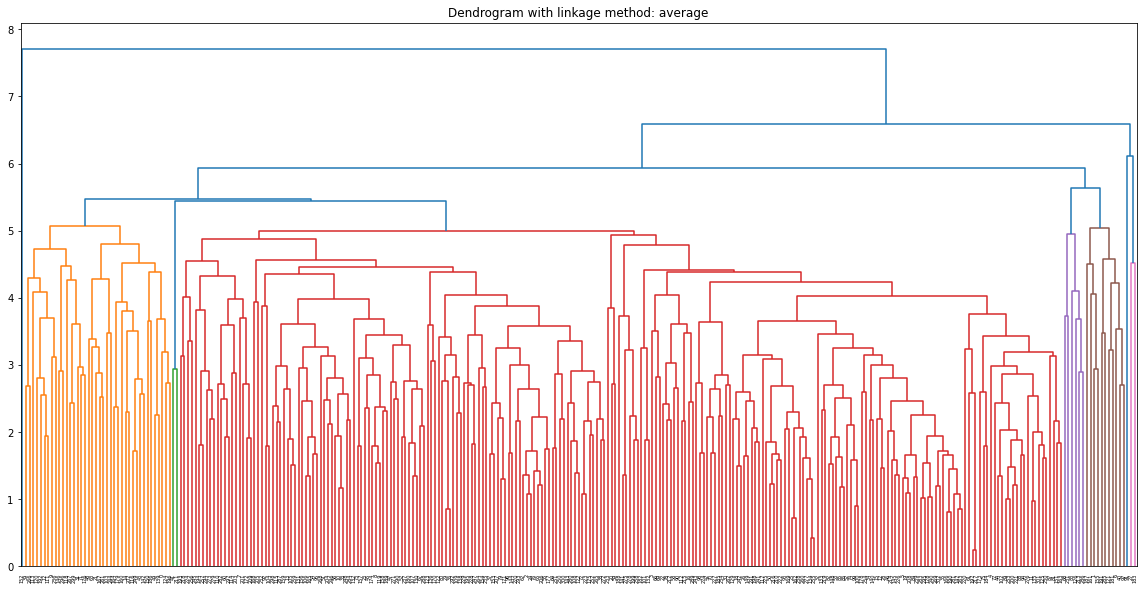

In [5]:
plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: average")
dendrogram(linkage(X_trans, method='average'))
plt.show()

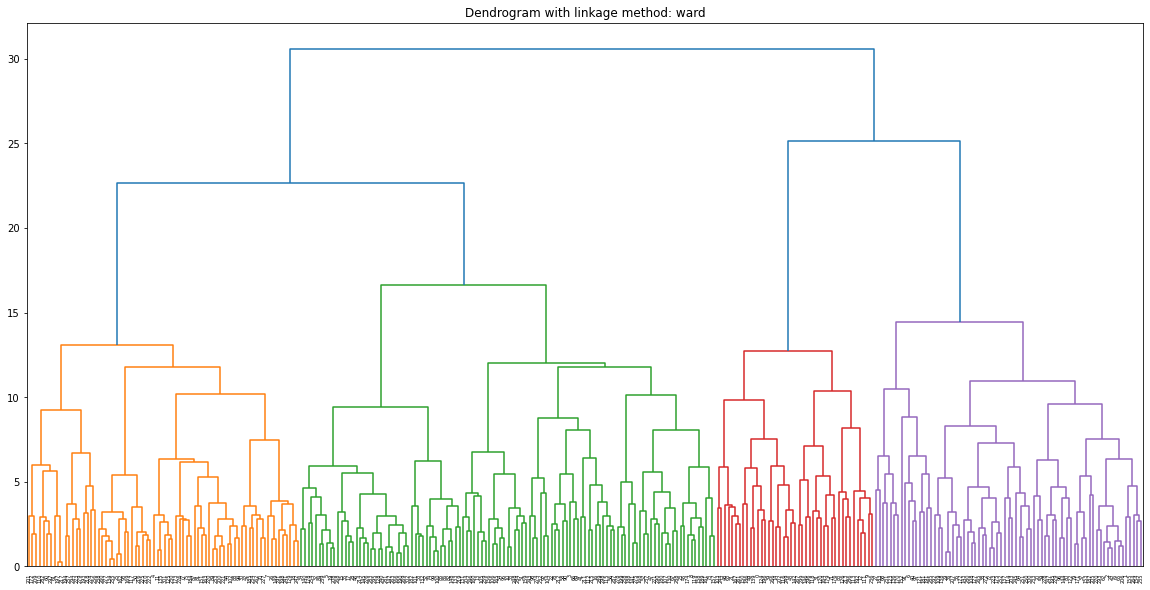

In [6]:
plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: ward")
dendrogram(linkage(X_trans, method='ward'))
plt.show()

Without reservation, ward makes the most sense.

In [14]:
#make a model using each linkage and compare their ARI and silhouette scores
agg = AgglomerativeClustering(linkage='complete', affinity='euclidean', n_clusters=2)

#Fit model
test = agg.fit_predict(X_trans)
print("ARI score: {}".format(metrics.adjusted_rand_score(y, test)))
print("Silhouette score: {}".format(metrics.silhouette_score(X_trans, test)))

ARI score: -0.0010061512759301477
Silhouette score: 0.34836188921330785


In [15]:
#make a model using each linkage and compare their ARI and silhouette scores
agg = AgglomerativeClustering(linkage='average', affinity='euclidean', n_clusters=2)

#Fit model
test = agg.fit_predict(X_trans)
print("ARI score: {}".format(metrics.adjusted_rand_score(y, test)))
print("Silhouette score: {}".format(metrics.silhouette_score(X_trans, test)))

ARI score: -0.0010061512759301477
Silhouette score: 0.34836188921330785


In [16]:
#make a model using each linkage and compare their ARI and silhouette scores
agg = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=2)

#Fit model
test = agg.fit_predict(X_trans)
print("ARI score: {}".format(metrics.adjusted_rand_score(y, test)))
print("Silhouette score: {}".format(metrics.silhouette_score(X_trans, test)))

ARI score: 0.146129913123814
Silhouette score: 0.1387197366557222


For the n_clusters = 2 from last checkpoint:<br>
ARI score: 0.43661540614807665<br>
Silhouette score: 0.17440650461256255<br>

Based only on the ARI score, I would use the KMeans. Based on silhouette, I would use AggromerativeClustering with either complete or average.